# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [2]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Prediction of Bank Customer Churn: 

There are two reasons why I’ve chosen this dataset for the capstone project. 
1. Customer churn prediction is critical for any organization. Understanding the customer churn trend can help organizations save money and reallocate resources to prepare for the future. 
2. For banK:
    - Retention rate is important for a bank because it indicates how many customers are staying with the bank over a period of time. 
    - A high retention rate means that the bank is able to keep its customers satisfied and engaged, which is crucial for maintaining long-term profitability


# Load the dataset

The dataset  used for the capstone project is ‘Predicting Churn for Bank Customers’ from Kaggle. 

In [3]:
df=pd.read_csv('C:/Users/seagu/Downloads/Churn_Modelling.csv',na_values='Nan')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#drop unnecessary column
df=df.drop(['RowNumber', "CustomerId", "Surname"],axis=1)

In [13]:
#check data distribution
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, Numerical_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe().T)
    display(data.describe(include=np.object).T)

display_data_description(df,data_types[0:4] ,data_types[4:7])

Data Description :


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


C:\Users\seagu\AppData\Local\Temp\ipykernel_32840\652038198.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


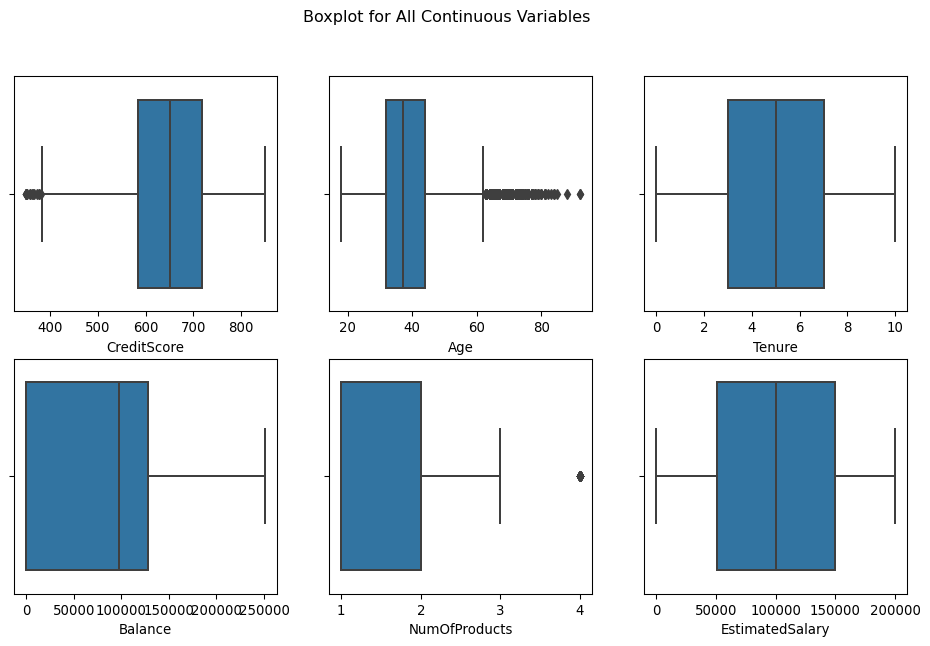

In [14]:
#check outliers in the numerical variables
fig, axs = plt.subplots(2,3,figsize=(12,7), dpi=96)

ax=sns.boxplot(x=df['CreditScore'], ax=axs[0,0])
ax=sns.boxplot(x=df['Age'], ax=axs[0,1])
ax=sns.boxplot(x=df['Tenure'], ax=axs[0,2])

ax=sns.boxplot(x=df['Balance'], ax=axs[1,0])
ax=sns.boxplot(x=df['NumOfProducts'], ax=axs[1,1])
ax=sns.boxplot(x=df['EstimatedSalary'], ax=axs[1,2])


plt.suptitle("Boxplot for All Continuous Variables")

plt.show()

In [5]:
# check for unique value
def check_data_unique(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:10])
check_data_unique(df)

CreditScore            460	 [619 608 502 699 850 645 822 376 501 684]
Geography                3	 ['France' 'Spain' 'Germany']
Gender                   2	 ['Female' 'Male']
Age                     70	 [42 41 39 43 44 50 29 27 31 24]
Tenure                  11	 [ 2  1  8  7  4  6  3 10  5  9]
Balance               6382	 [     0.    83807.86 159660.8  125510.82 113755.78 115046.74 142051.07
 134603.88 102016.72 143129.41]
NumOfProducts            4	 [1 3 2 4]
HasCrCard                2	 [1 0]
IsActiveMember           2	 [1 0]
EstimatedSalary       9999	 [101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8
 119346.88  74940.5   71725.73]
Exited                   2	 [1 0]


In [5]:
#check missing value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
# Check for duplicate 
print('Duplicated value(s) in our dataset : ', df.duplicated().sum())

Duplicated value(s) in our dataset :  0


# EDA

In [7]:
sns.set_style("whitegrid")

In [10]:
df['Exited_Or_Not'] = df.loc[:, 'Exited']
df['Exited_Or_Not'].replace([1, 0],
                        ['Exited', 'Retained'], inplace=True)

## Continuous analysis:

In [8]:
continuous_data=df.select_dtypes(include='number')
continuous_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


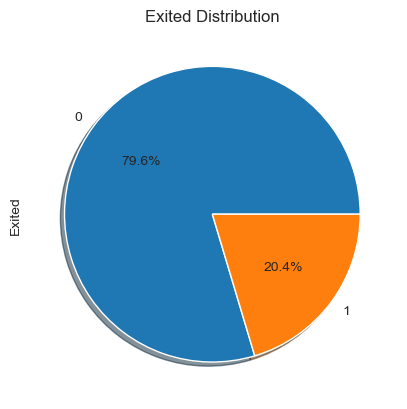

In [ ]:
df['Exited'].value_counts().plot.pie(title="Exited Distribution",autopct='%1.1f%%',shadow=True,startangle=0)
plt.show()

Unbalanced sample sizes can have a significant impact on the performance of a model, especially in classification models:
1. It could bias towards the majority class
2. The model may not be able to generalize well to new, unseen data
3. Evaluation metrics like recall and precision would be affected

* use the synthetic minority oversampling technique (SMOTE) to upsample the churn samples to match the regular sample size


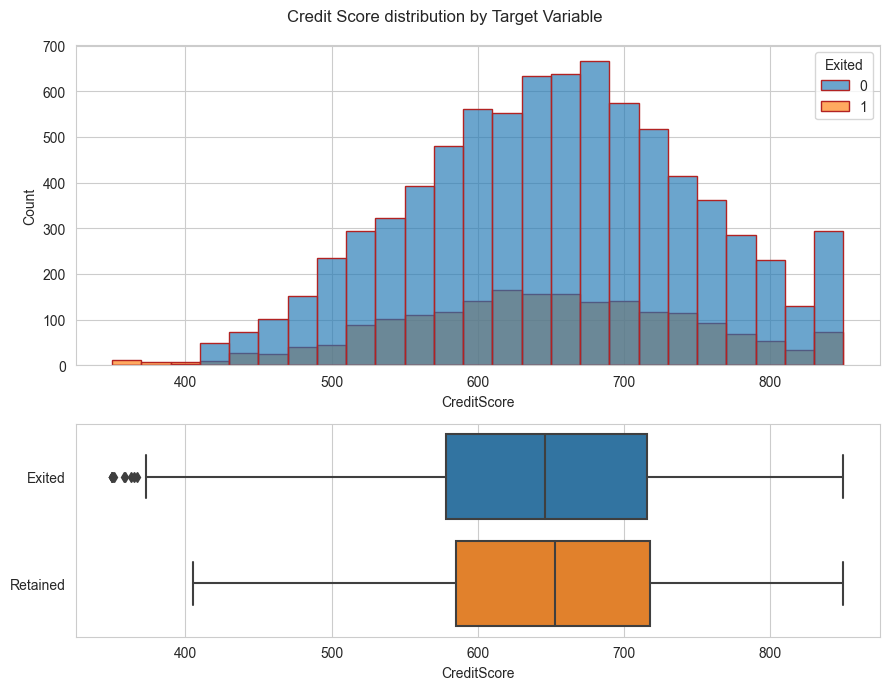

In [12]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="CreditScore",hue='Exited',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="CreditScore", y='Exited_Or_Not', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Exited', 'Retained'])
plt.suptitle("Credit Score distribution by Target Variable")
plt.tight_layout()

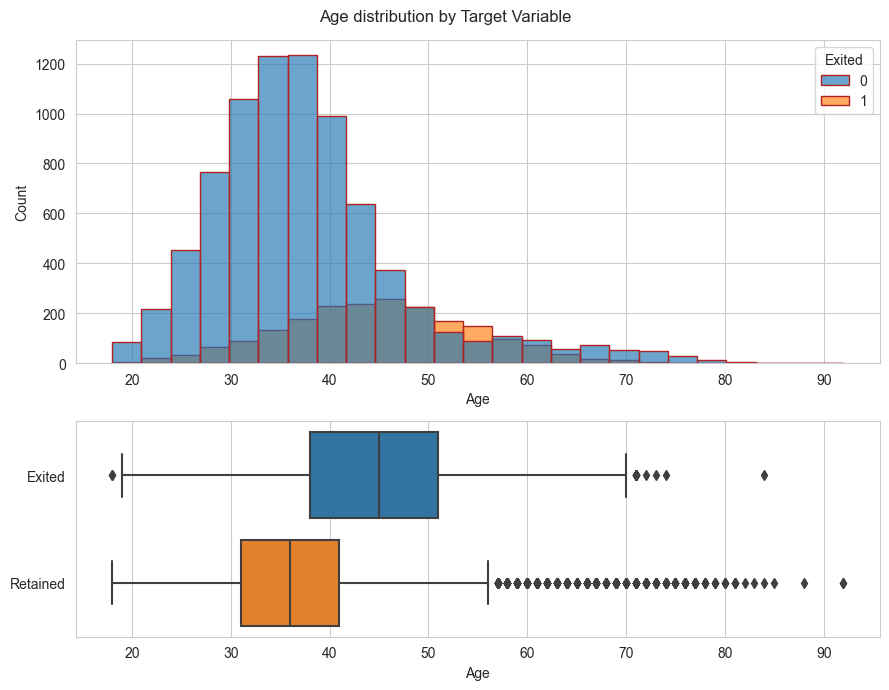

In [13]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Age",hue='Exited',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Age", y='Exited_Or_Not', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Exited', 'Retained'])
plt.suptitle("Age distribution by Target Variable")
plt.tight_layout()

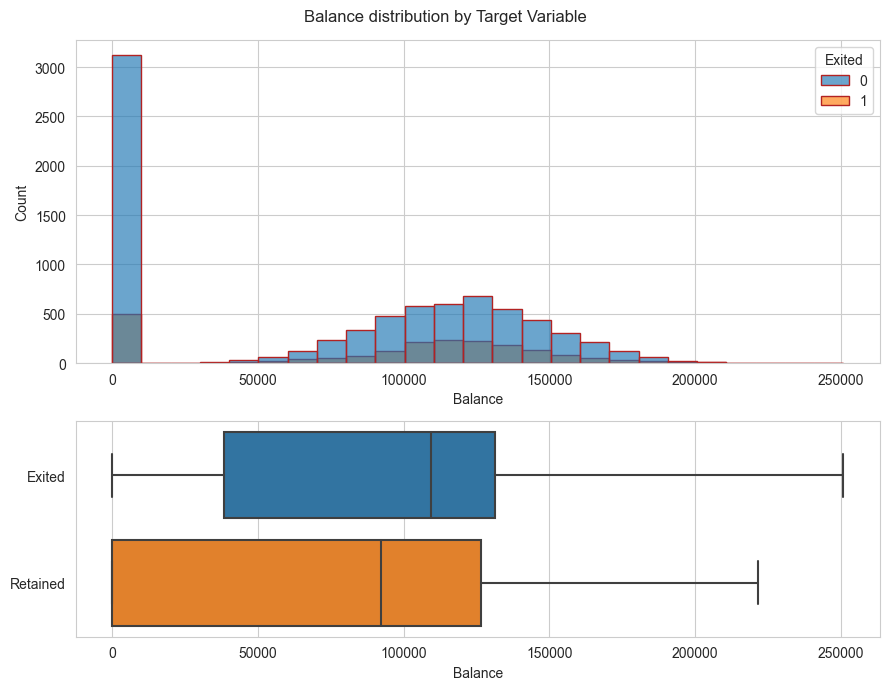

In [14]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Balance",hue='Exited',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Balance", y='Exited_Or_Not', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Exited', 'Retained'])
plt.suptitle("Balance distribution by Target Variable")
plt.tight_layout()

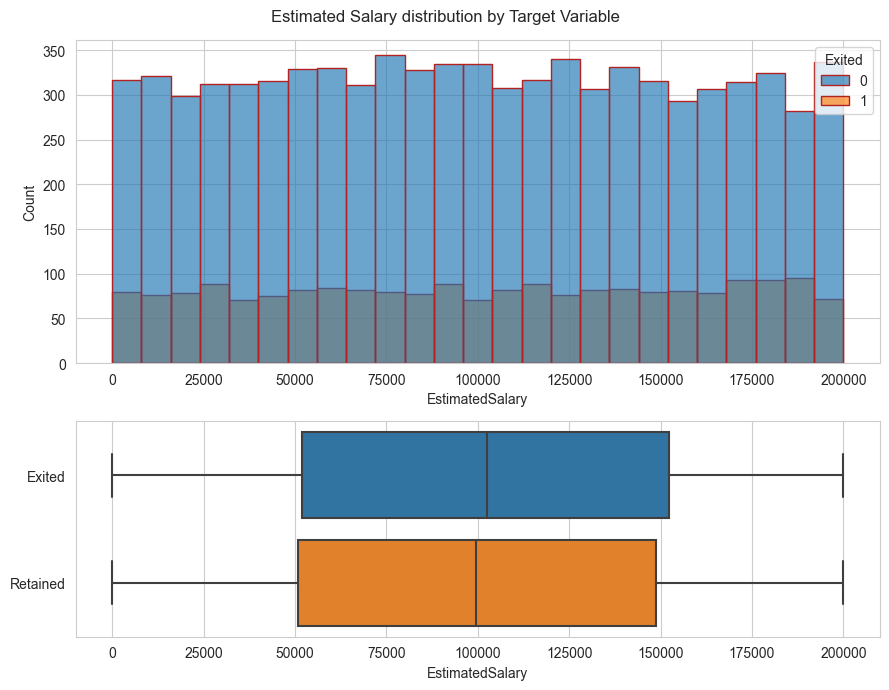

In [17]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="EstimatedSalary",hue='Exited',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="EstimatedSalary", y='Exited_Or_Not', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Exited', 'Retained'])
plt.suptitle("Estimated Salary distribution by Target Variable")
plt.tight_layout()

## Categorical analysis:

In [19]:
categorical_data=df.select_dtypes(exclude='number')
categorical_data.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [21]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


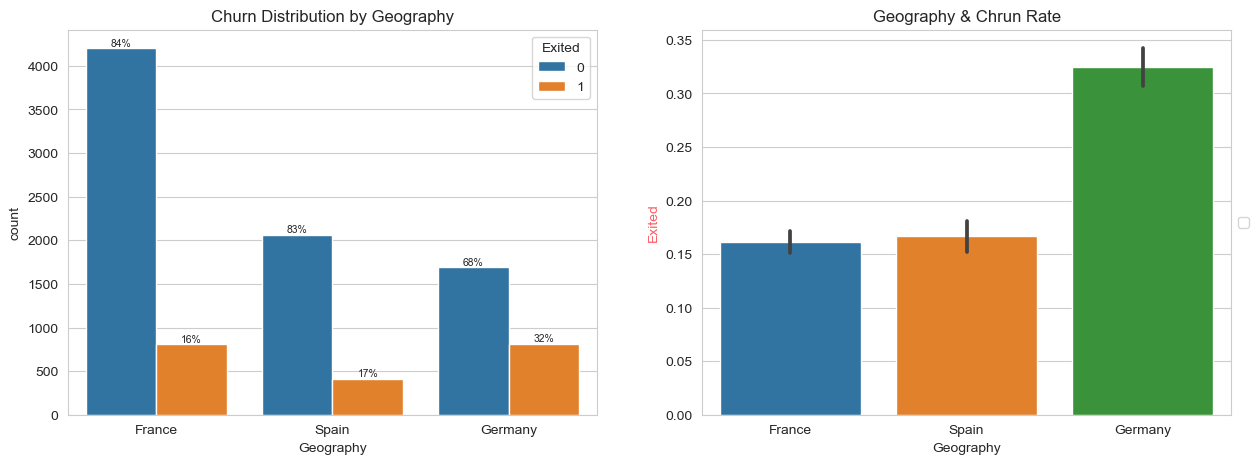

In [56]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by Geography')
axs[1].set_title('Geography & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Geography',hue='Exited',data=df,ax=axs[0])
barPerc(df,'Geography',ax)


ax=sns.barplot(data=df, x="Geography", y="Exited",ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


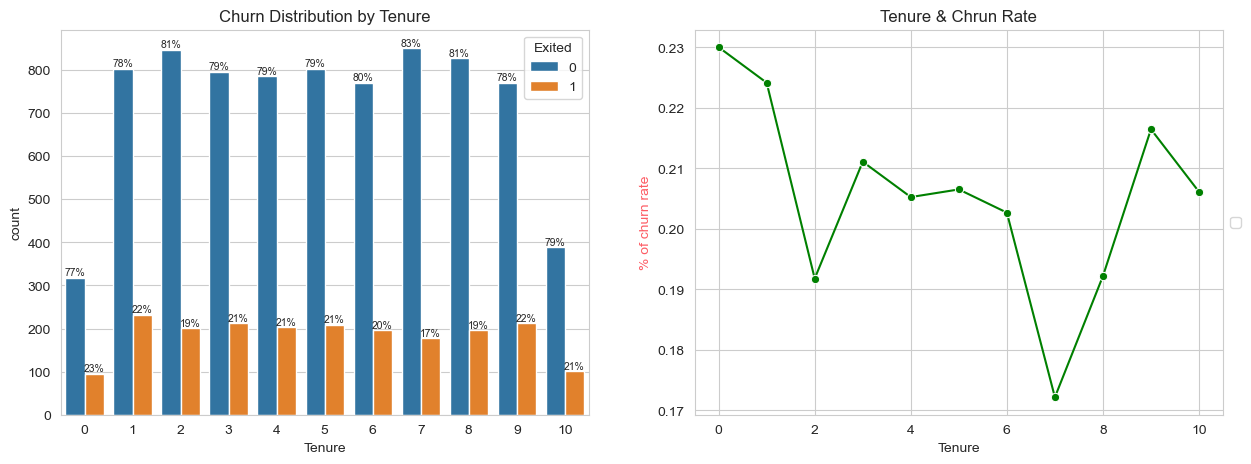

In [45]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by Tenure')
axs[1].set_title('Tenure & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Tenure',hue='Exited',data=df,ax=axs[0])
barPerc(df,'Tenure',ax)


ax=sns.lineplot(data=df, x="Tenure", y="Exited",ci=None, color="green", marker='o',ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


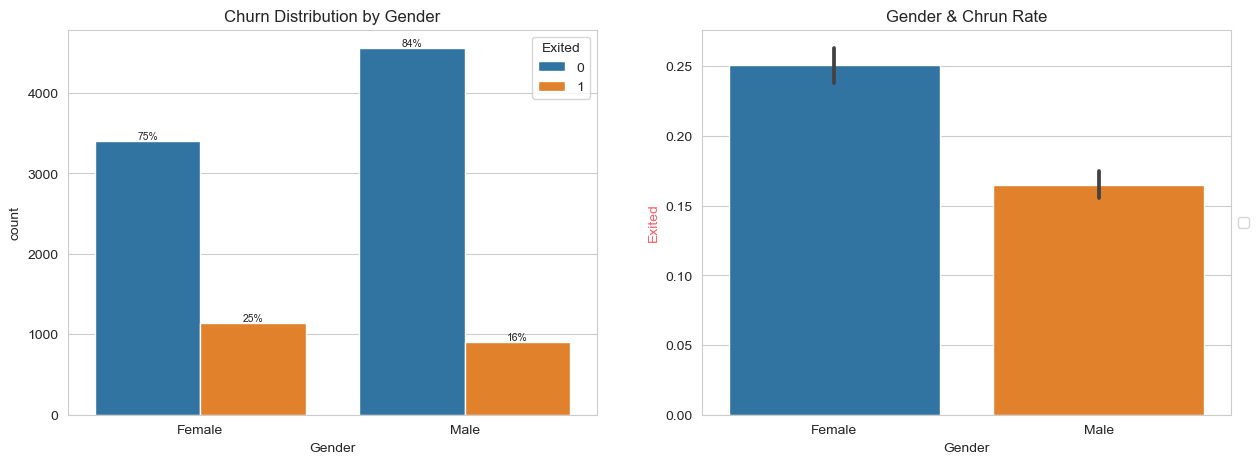

In [55]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by Gender')
axs[1].set_title('Gender & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Gender',hue='Exited',data=df,ax=axs[0])
barPerc(df,'Gender',ax)


ax=sns.barplot(data=df, x="Gender", y="Exited",ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


posx and posy should be finite values
posx and posy should be finite values


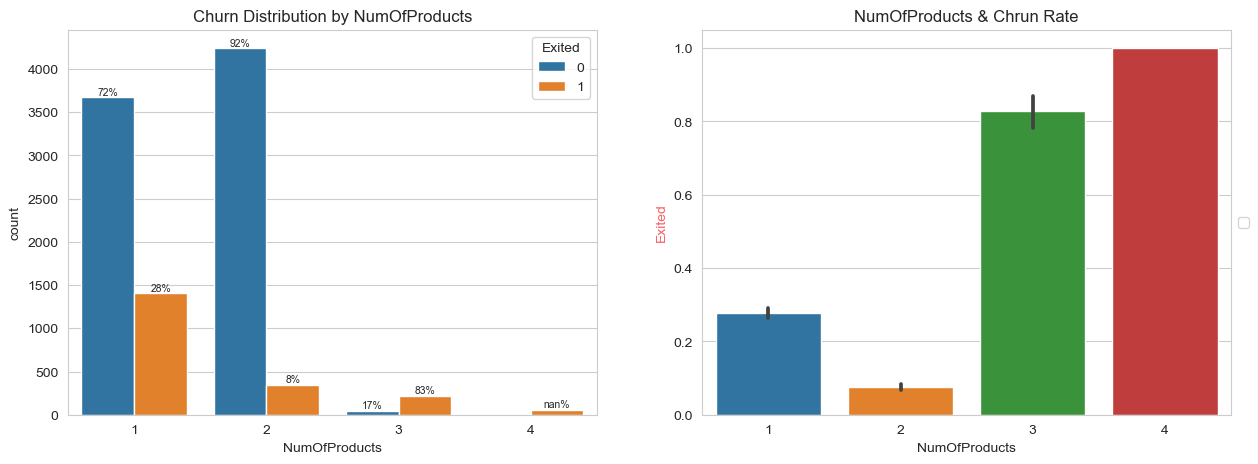

In [52]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by NumOfProducts')
axs[1].set_title('NumOfProducts & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='NumOfProducts',hue='Exited',data=df,ax=axs[0])
barPerc(df,'NumOfProducts',ax)


ax=sns.barplot(data=df, x="NumOfProducts", y="Exited",ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


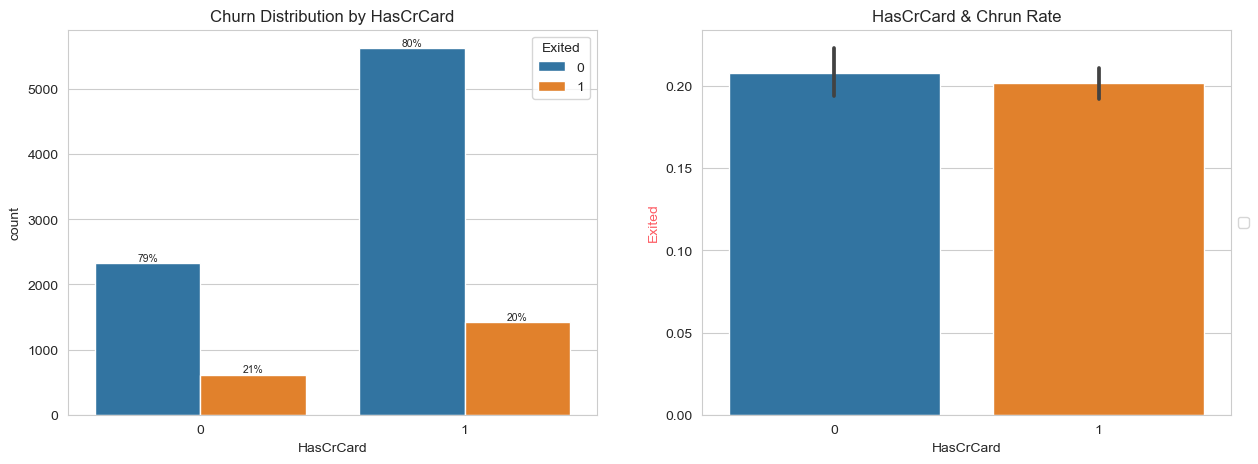

In [51]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by HasCrCard')
axs[1].set_title('HasCrCard & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=axs[0])
barPerc(df,'HasCrCard',ax)


ax=sns.barplot(data=df, x="HasCrCard", y="Exited",ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


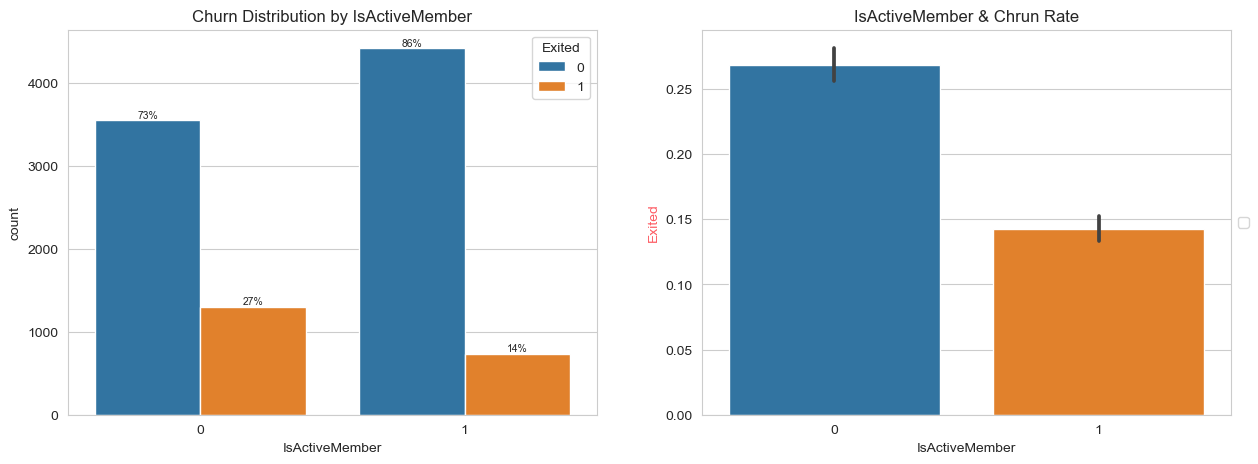

In [50]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Churn Distribution by IsActiveMember')
axs[1].set_title('IsActiveMember & Chrun Rate')
axs[1].set_ylabel('% of churn rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=axs[0])
barPerc(df,'IsActiveMember',ax)


ax=sns.barplot(data=df, x="IsActiveMember", y="Exited",ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Correlation Matrix:

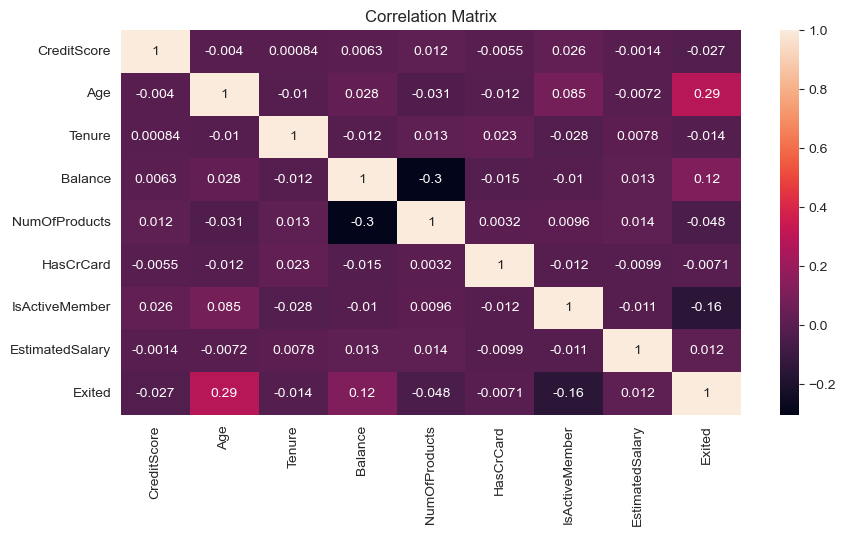

In [ ]:
plt.figure(figsize=[8,5])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

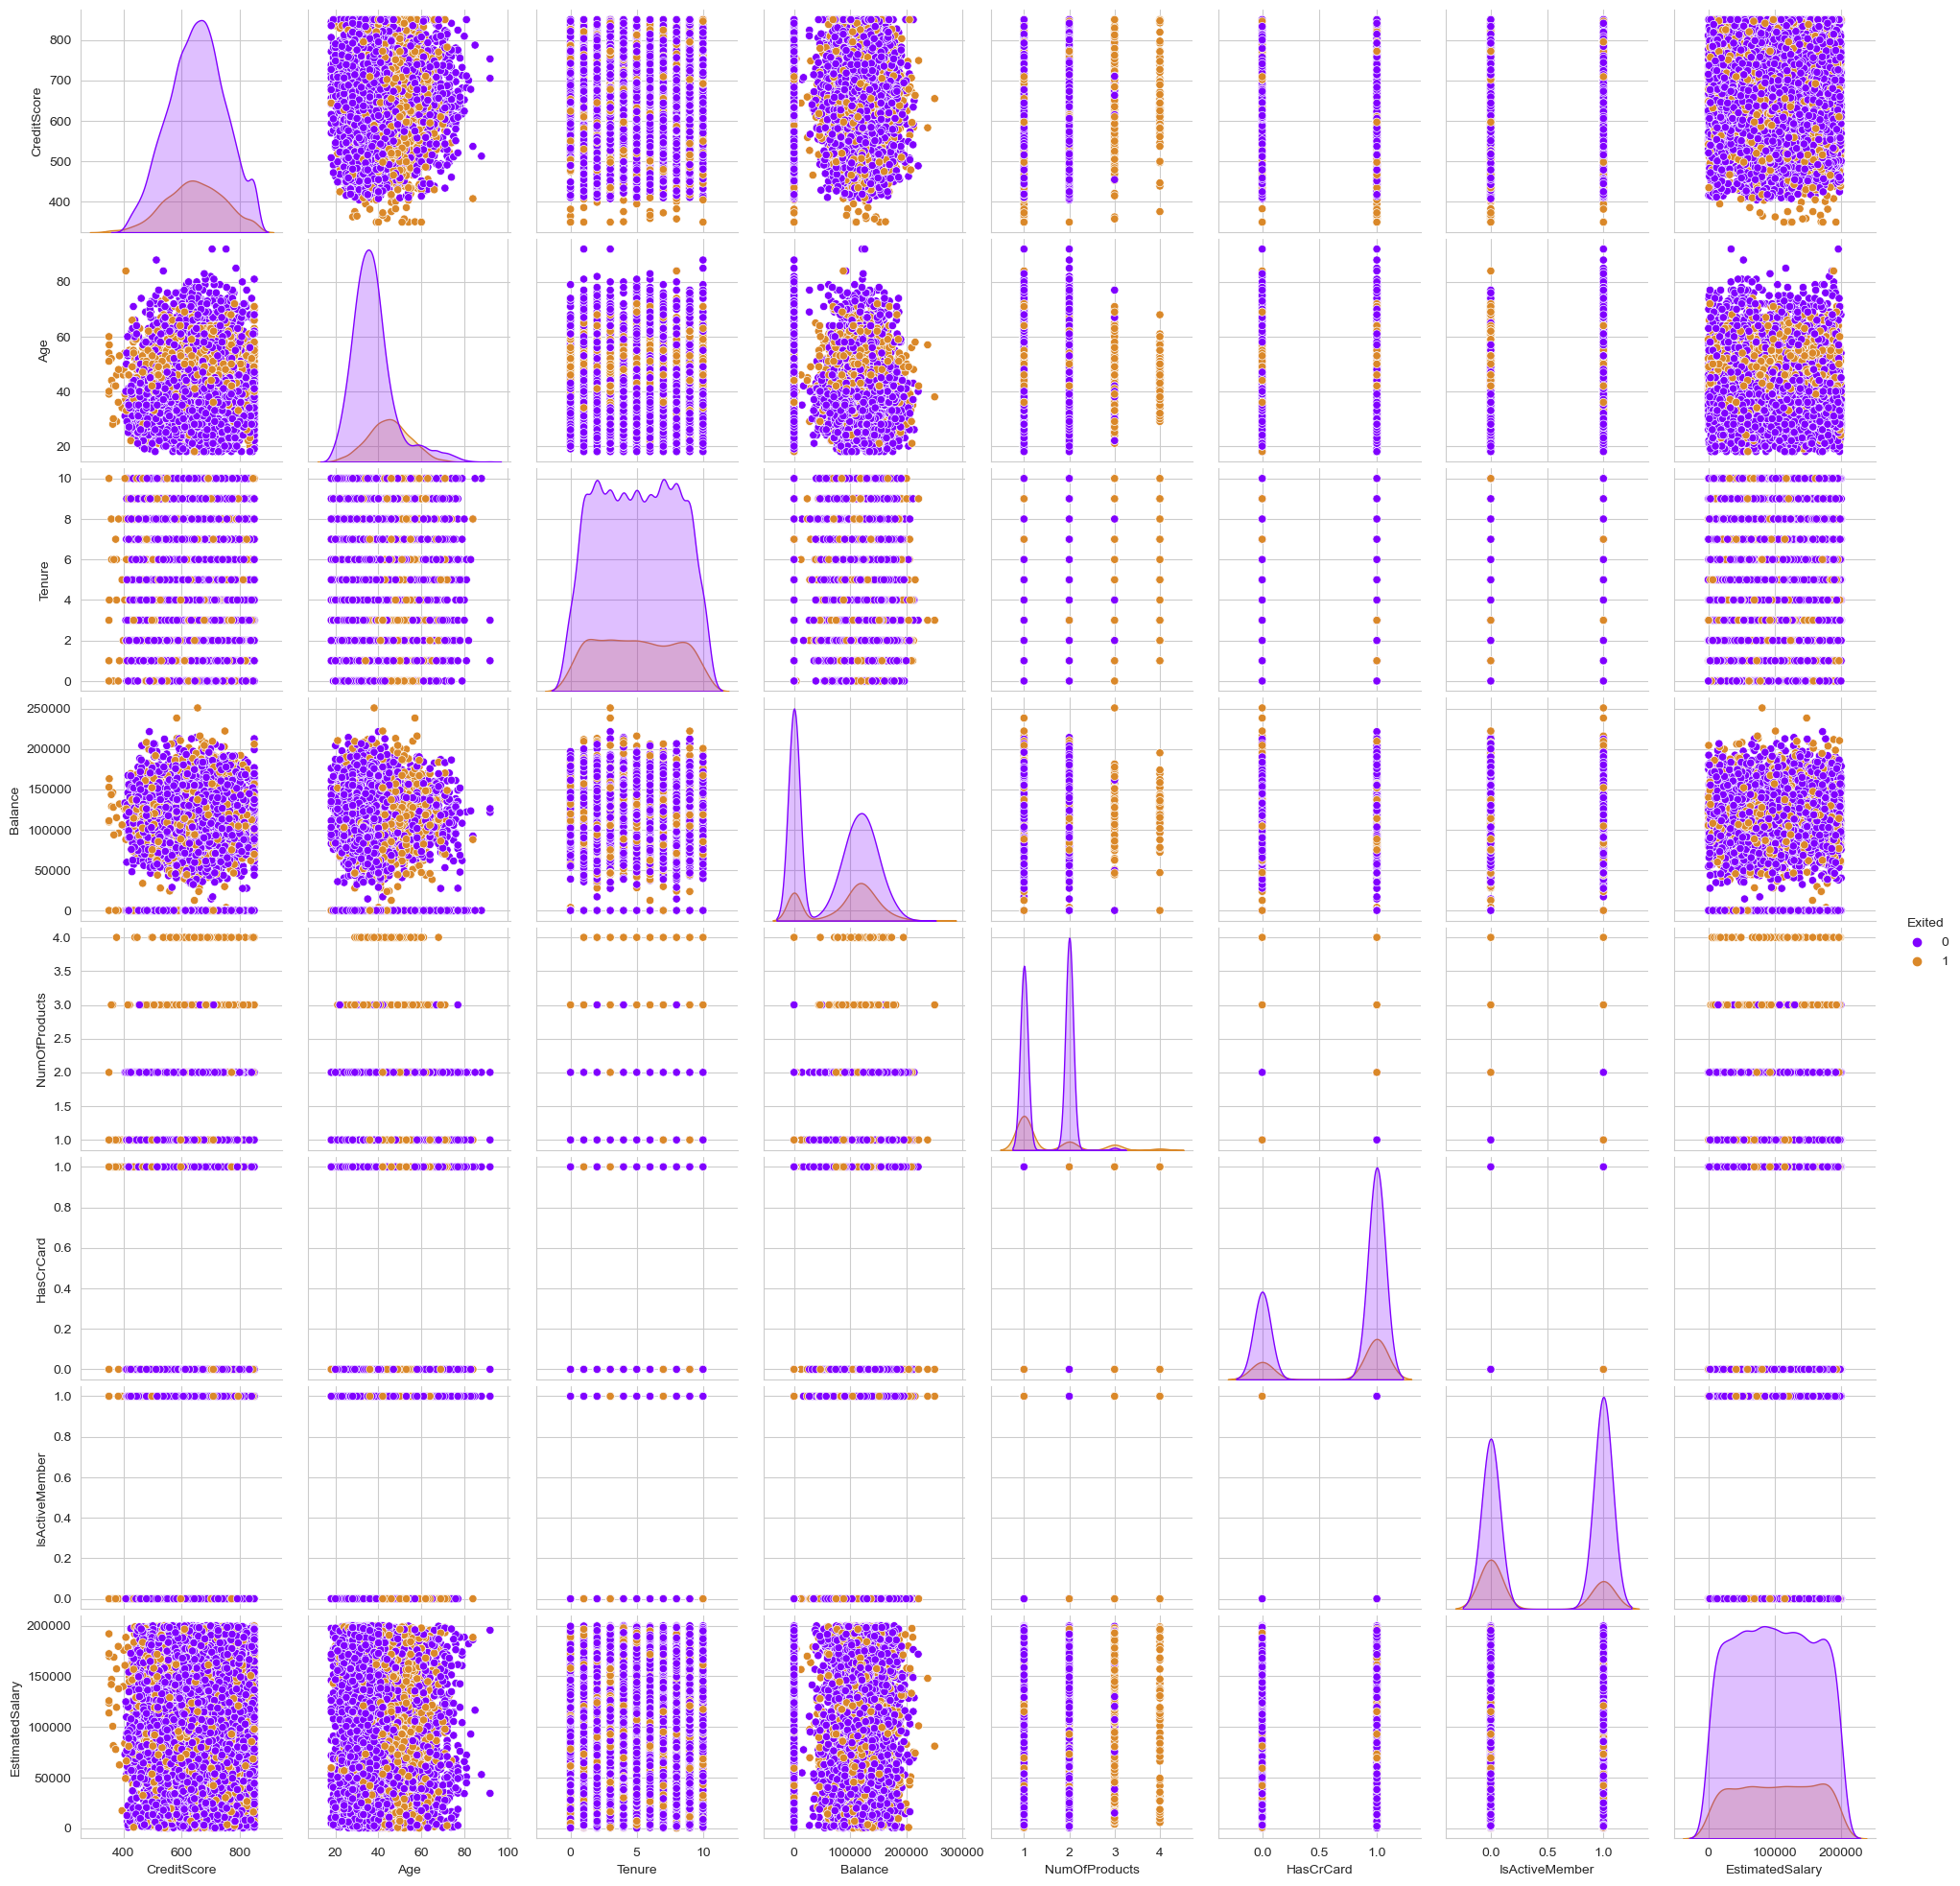

In [94]:
sns.pairplot(df,hue='Exited',palette = ["#8000ff","#da8829"])
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = continuous_data.columns
VIF['VIF']      = [variance_inflation_factor(continuous_data.values, i) for i in range(continuous_data.shape[1])]
# take a look
VIF

,feature,VIF
0,CreditScore,20.690979
1,Age,13.606988
2,Tenure,3.866685
3,Balance,2.651487
4,NumOfProducts,7.705552
5,HasCrCard,3.286672
6,IsActiveMember,2.150729
7,EstimatedSalary,3.885184
8,Exited,1.435330


# Modeling

### Load Libraries

#### Load ML Libraries

In [20]:
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVC

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt

## Data Processing

In [67]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X = df.drop('Exited', axis = 1)
y = df['Exited'] 

#### Feature Engineering

In [22]:
numeric_features = ["CreditScore", "Age",'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ("scaler", StandardScaler())]
)

categorical_features = ["Geography", "Gender"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [23]:
X_prepared=preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

As we can see from the pervious exploration, only 20.4% of the data samples represent churn customers; in the following steps, I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.

In [24]:
from imblearn.combine import SMOTETomek
#Use Synthetic Minority Oversampling TEchnique to deal with imbalanced dataset

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)
print(X_test.shape, y_test.shape)

(12544, 13) (12544,)
(3200, 13) (3200,)


In [25]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [26]:
get_feature_names(preprocessor)

C:\Users\seagu\AppData\Local\Temp\ipykernel_18724\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_18724\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__CreditScore',
 'num__Age',
 'num__Tenure',
 'num__Balance',
 'num__NumOfProducts',
 'num__HasCrCard',
 'num__IsActiveMember',
 'num__EstimatedSalary',
 'onehot__x0_France',
 'onehot__x0_Germany',
 'onehot__x0_Spain',
 'onehot__x1_Female',
 'onehot__x1_Male']

### Metrics

The most important metric used is Recall. This metric indicates the proportion of positive results yielded by the model by the total number of positive labels in the dataset. In this case, the Recall reveals the proportion of churns identified correctly by the total number of churns.

I also kept track of Precision as a secondary metric. Precision indicates the proportion of positives yielded by the models that are actually true positives.

For the problem I was dealing with, Recall is more important because it's preferable to have a model that does not miss any churns but sometimes classify a non-churns as churns, than a model that does not classify non-churns as churns but misses a lot of churns. In other words, we prefer to be incorrect when classifying a non-churning costumer than when classifying a churning customer.


## Implement Models

### Logistic Regression Models

In [105]:
lr = LogisticRegression()
lr= lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [93]:
# print prediction results
print('Model accuracy score with default hyperparameters on test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Model accuracy score with default hyperparameters on train set: {0:0.4f}'. format(lr.score(X_train,y_train)))

print('Training error =', 100*(1-lr.score(X_train,y_train)), '%')
print('Testing error', 100*(1-lr.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_lr)))

Model accuracy score with default hyperparameters on test set: 0.8110
Model accuracy score with default hyperparameters on train set: 0.8113
Training error = 18.874999999999996 %
Testing error 18.899999999999995 %
F1 Score:  0.2947761194029851
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix : 
[[1543   64]
 [ 314   79]]


In [74]:
from sklearn.model_selection import GridSearchCV
#Grid Search for logistic regression
log_reg_params= {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
log_reg_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=log_reg_params, cv=10)
log_reg_grid.fit(X_train, y_train)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [75]:
print(f'Logistic Regression:\n\t *best params: {log_reg_grid.best_params_}\n\t *best score: {log_reg_grid.best_score_}')

Logistic Regression:
	 *best params: {'C': 0.01, 'penalty': 'l2'}
	 *best score: 0.8108749999999999


In [40]:
#### Using Optimal values of Hyperparameters
best_log_reg = LogisticRegression(C=0.01,penalty='l2')
best_log_reg.fit(X_train, y_train)
log_reg_predicted = best_log_reg.predict(X_test)

# calculating the probabilities
y_pred_proba = best_log_reg.predict_proba(X_test)

In [41]:
print('Logistic Regression Model accuracy score with grid search on test set: {0:0.4f}'. format(accuracy_score(y_test, log_reg_predicted)))
print('Logistic Regression Model accuracy score with grid search on train set: {0:0.4f}'. format(best_log_reg.score(X_train,y_train)))

print('Logistic Regression Model Training error =', 100*(1-best_log_reg.score(X_train,y_train)), '%')
print('Logistic Regression Model Testing error', 100*(1-best_log_reg.score(X_test,y_test)), '%')

print('Logistic Regression Model F1 Score: ',f1_score(y_test, log_reg_predicted))
print(classification_report(y_test, log_reg_predicted))

Logistic Regression Model accuracy score with grid search on test set: 0.7356
Logistic Regression Model accuracy score with grid search on train set: 0.7148
Logistic Regression Model Training error = 28.52359693877551 %
Logistic Regression Model Testing error 26.437500000000004 %
Logistic Regression Model F1 Score:  0.7364485981308411
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1600
           1       0.73      0.74      0.74      1600

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200



ROC Curver

In [24]:
# calculating the probabilities
y_pred_prob = best_log_reg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

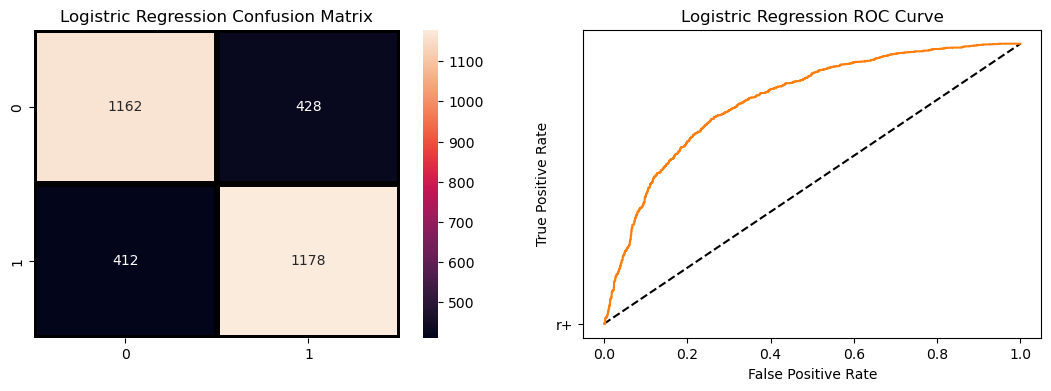

In [25]:
fig, axs = plt.subplots(ncols=2,figsize=(13,4))
axs[0].set_title("Logistric Regression Confusion Matrix")

axs[1].set_title("Logistric Regression ROC Curve")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_xlabel("False Positive Rate")


ax=sns.heatmap(confusion_matrix(y_test, log_reg_predicted),
                annot=True,fmt = "d",linecolor="k",linewidths=3, ax=axs[0])

ax=plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')

plt.show()

Feature Importance

In [126]:
a=best_log_reg.coef_.transpose()
coef = [i[0] for i in a]
coef

feat_importances = pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"coef":coef})
feat_importances = feat_importances[['Feature_Name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)

C:\Users\seagu\AppData\Local\Temp\ipykernel_32840\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_32840\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


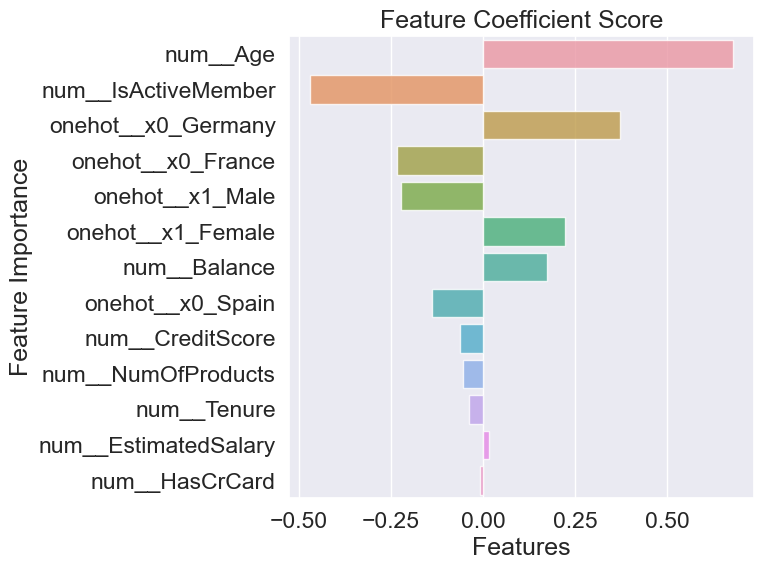

In [127]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
sns.barplot(feat_importances[0:20].coef,feat_importances[0:20].Feature_Name,alpha=0.8)
plt.title('Feature Coefficient Score')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

### SVM

In [15]:
#Support Vector Machine
svc=SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [16]:
# print prediction results
print('Model accuracy score with default hyperparameters on test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters on train set: {0:0.4f}'. format(svc.score(X_train,y_train)))

print('Training error =', 100*(1-svc.score(X_train,y_train)), '%')
print('Testing error', 100*(1-svc.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Model accuracy score with default hyperparameters on test set: 0.7877
Model accuracy score with default hyperparameters on train set: 0.8382
Training error = 16.181152499204078 %
Testing error 21.22641509433962 %
F1 Score:  0.7846889952153109
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1590
           1       0.80      0.77      0.78      1590

    accuracy                           0.79      3180
   macro avg       0.79      0.79      0.79      3180
weighted avg       0.79      0.79      0.79      3180

Confusion Matrix : 
[[1275  315]
 [ 360 1230]]


In [17]:
#Grid Search for SVM
svm_params = {'C': [1, 10, 100], 
              'gamma': [1, 0.1, 0.01]} 
svm_grid = GridSearchCV(SVC(), svm_params, refit = True, verbose = 0)              
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01]})

In [18]:
print(f'Support Vector Machine:\n\t *best params: {svm_grid.best_params_}\n\t *best score: {svm_grid.best_score_}')

Support Vector Machine:
	 *best params: {'C': 10, 'gamma': 1}
	 *best score: 0.9328246937580632


In [42]:
#### Using Optimal values of Hyperparameters
best_svc = SVC(C=10,gamma=1)
best_svc.fit(X_train, y_train)
best_svc_predicted = best_svc.predict(X_test)

In [43]:
# print prediction results
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_svc_predicted)))
print('Model accuracy score with Grid Search on  train set: {0:0.4f}'. format(best_svc.score(X_train,y_train)))

print('Training error =', 100*(1-best_svc.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_svc.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, best_svc_predicted))
print(classification_report(y_test, best_svc_predicted))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,best_svc_predicted)))

Model accuracy score with Grid Search on test set: 0.6644
Model accuracy score with Grid Search on  train set: 0.9985
Training error = 0.15146683673469274 %
Testing error 33.56249999999999 %
F1 Score:  0.5591133004926108
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      1600
           1       0.81      0.43      0.56      1600

    accuracy                           0.66      3200
   macro avg       0.71      0.66      0.64      3200
weighted avg       0.71      0.66      0.64      3200

Confusion Matrix : 
[[1445  155]
 [ 919  681]]


C:\Users\seagu\AppData\Local\Temp\ipykernel_26140\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_26140\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


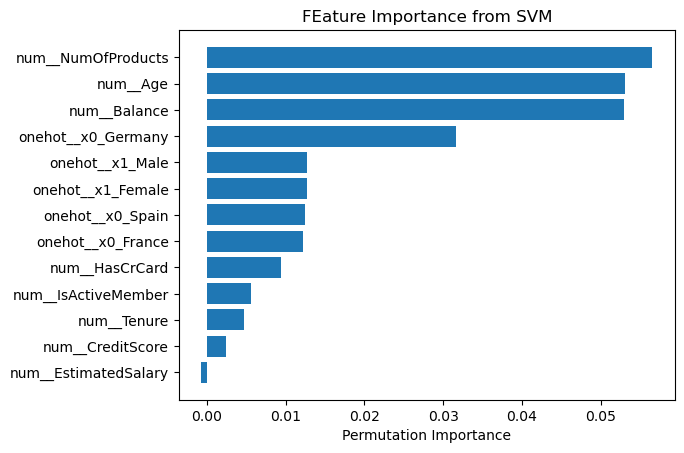

In [21]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_svc, X_test, y_test)

feature_names = get_feature_names(preprocessor)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title('FEature Importance from SVM')
plt.show()


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier()
rmf.fit(X_train,y_train)
y_pred=rmf.predict(X_test)

In [30]:
# print prediction results
print('Model accuracy score with default hyperparameters on test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters on train set: {0:0.4f}'. format(rmf.score(X_train,y_train)))

print('Training error =', 100*(1-rmf.score(X_train,y_train)), '%')
print('Testing error', 100*(1-rmf.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Model accuracy score with default hyperparameters on test set: 0.8541
Model accuracy score with default hyperparameters on train set: 1.0000
Training error = 0.0 %
Testing error 14.593750000000005 %
F1 Score:  0.8465330266184686
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1600
           1       0.89      0.81      0.85      1600

    accuracy                           0.85      3200
   macro avg       0.86      0.85      0.85      3200
weighted avg       0.86      0.85      0.85      3200

Confusion Matrix : 
[[1445  155]
 [ 312 1288]]


In [31]:
#Grid Search for randomforest
rf_params = {'n_estimators': [5,10,20,50],
            'max_features': [4,6,9,12],
            'min_samples_split': [3, 5, 6, 7]} 
CV_rfc = GridSearchCV(RandomForestClassifier(), rf_params, cv=2, refit=True, verbose=0, scoring = "recall")              
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 6, 9, 12],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [5, 10, 20, 50]},
             scoring='recall')

In [32]:
print(f'Support Vector Machine:\n\t *best params: {CV_rfc.best_params_}\n\t *best score: {CV_rfc.best_score_}')

Support Vector Machine:
	 *best params: {'max_features': 4, 'min_samples_split': 3, 'n_estimators': 50}
	 *best score: 0.8844068877551021


In [33]:
#### Using Optimal values of Hyperparameters
best_rf = RandomForestClassifier(n_estimators=50,max_features=4,max_depth=2,criterion='entropy',min_samples_split=3)
best_rf.fit(X_train, y_train)
best_rf_predicted = best_rf.predict(X_test)

In [34]:
# print prediction results
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_rf_predicted)))
print('Model accuracy score with Grid Search on train set: {0:0.4f}'. format(best_rf.score(X_train,y_train)))

print('Training error =', 100*(1-best_rf.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_rf.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, best_rf_predicted))
print(classification_report(y_test, best_rf_predicted))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,best_rf_predicted)))

Model accuracy score with Grid Search on test set: 0.7869
Model accuracy score with Grid Search on train set: 0.7667
Training error = 23.33386479591837 %
Testing error 21.3125 %
F1 Score:  0.7911818738518065
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1600
           1       0.78      0.81      0.79      1600

    accuracy                           0.79      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.79      0.79      0.79      3200

Confusion Matrix : 
[[1226  374]
 [ 308 1292]]


We found the features deemed significant by the random forest are more valuable and aligned with our hypothesis from the EDA. 
Specifically, the random forest model indicates that the customer's age, the number of products purchased, and the customer's country are significant factors that influence whether the customer will churn.


In [35]:
feature_importance=pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"Coef":best_rf.feature_importances_})
feature_importance = feature_importance[['Feature_Name','Coef']]
feature_importance['Importances']=np.abs(feature_importance['Coef'])
feature_importance.sort_values(by='Importances',inplace=True, ascending=False)
feature_importance

C:\Users\seagu\AppData\Local\Temp\ipykernel_18724\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_18724\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,Feature_Name,Coef,Importances
1,num__Age,0.415661,0.415661
4,num__NumOfProducts,0.216916,0.216916
9,onehot__x0_Germany,0.116062,0.116062
6,num__IsActiveMember,0.083837,0.083837
11,onehot__x1_Female,0.064050,0.064050
3,num__Balance,0.063900,0.063900
8,onehot__x0_France,0.028084,0.028084
12,onehot__x1_Male,0.010175,0.010175
10,onehot__x0_Spain,0.001041,0.001041
7,num__EstimatedSalary,0.000155,0.000155


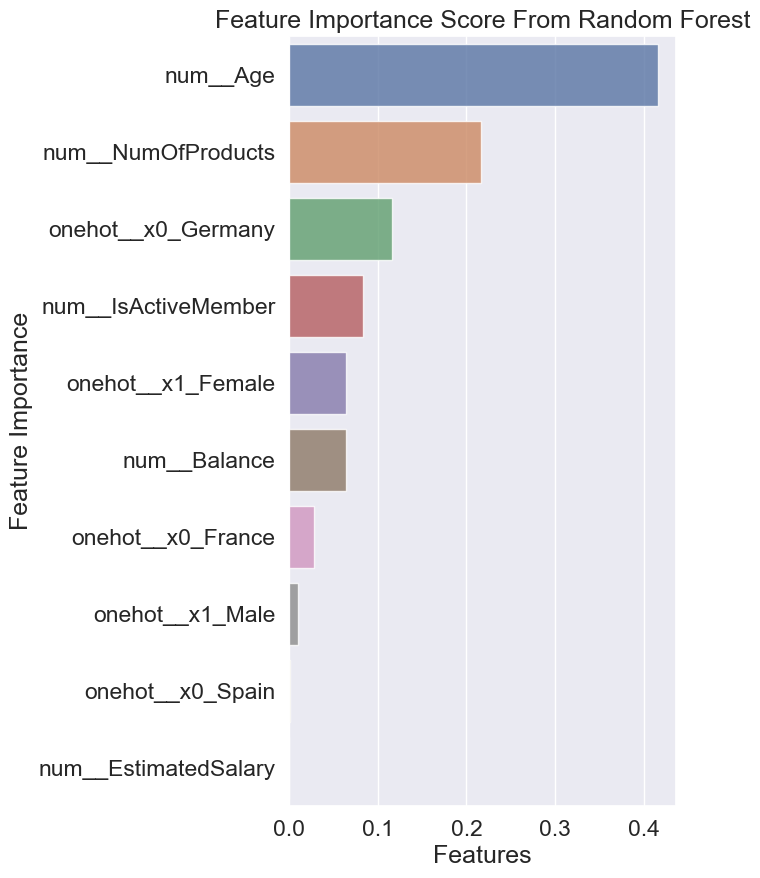

In [36]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,10))
sns.barplot(feature_importance[0:20].Coef,feature_importance[0:10].Feature_Name,alpha=0.8)
plt.title('Feature Importance Score From Random Forest')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

## Model Comparison

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:,1])
# fpr_dc, tpr_dc, _ = roc_curve(y_test, best_svc.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])


In [47]:
lr_roc_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1] , average = 'macro')
# dc_roc_auc = roc_auc_score(y_test, best_svc.predict_proba(X_test)[:,1] , average = 'macro')
rf_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1] , average = 'macro')

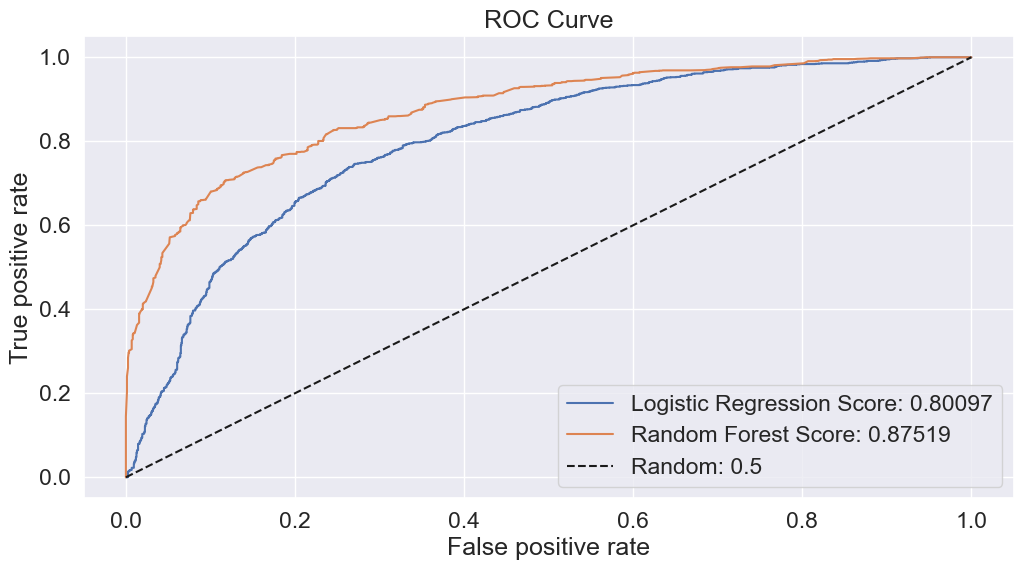

In [48]:
plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression Score: ' + str(round(lr_roc_auc, 5)))
# plt.plot(fpr_dc, tpr_dc, label = 'Decision Tree score: ' + str(round(dc_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest Score: ' + str(round(rf_roc_auc, 5)))


plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [49]:
lr_acc=best_log_reg.score(X_test,y_test)
svc_acc=best_svc.score(X_test,y_test)
rf_acc=best_rf.score(X_test,y_test)

In [50]:
lr_recall=recall_score(y_test, log_reg_predicted)
svc_recall=recall_score(y_test, best_svc_predicted)
rf_recall=recall_score(y_test, best_rf_predicted)

lr_pre=precision_score(y_test, log_reg_predicted)
svc_pre=precision_score(y_test, best_svc_predicted)
rf_pre=precision_score(y_test, best_rf_predicted)

Multiple metrics benchmarking method to compared these three models
- Our goal for this project is to provide some insights for the bank on customer churn, the bank would emphasize more on a model that does not miss any churns but sometimes classifies a retained customer as churn. we hope to identify better whether the customer would churn because we prefer to be incorrect when classifying a non-churning costumer than when classifying a churning customer. 
    - So The 'Recall' rate has been chosen as the most important model evaluation metric. 
1. Logistic : The Logistic precision rate is 0.73, which means out of all the customer that the model predicted would churn, 73% actually did. The recall rate is 0.73, so out of all the customers that actually churned, the model predicted that outcome correctly for 73% of those subscribers.
2. SVM:  The SVM precision rate is 0.81, which means out of all the customer that the model predicted would churn, 81% actually did. The recall rate is 0.42, so out of all the customers that actually churned, the model only predicted that outcome correctly for 42% of those subscribers.
3. Random Forest:  The Random Forest’s precision rate is 0.77, which means out of all the customer that the model predicted would churn, 77% actually did. The recall rate is 0.80, so out of all the customers that actually churned, the model only predicted that outcome correctly for 80% of those subscribers.


In [51]:
models = ['Logistic Regression', 'Support Vector Machine','Random Forest']
accuracy = [lr_acc,svc_acc,rf_acc]
recall=[lr_recall,svc_recall,rf_recall]
precision=[lr_pre,svc_pre,rf_pre]

d = {'accuracy': accuracy,'recall':recall,'precision':precision}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,recall,precision
Logistic Regression,0.735625,0.738750,0.734161
Support Vector Machine,0.664375,0.425625,0.814593
Random Forest,0.786875,0.807500,0.775510


# Recommendation & Findings

1. The analysis provides insights into how the bank should react to the increase in retaining rate.
2. Younger customers have a lower churn rate, so the bank should design new products/services for elder customers.
3. High-balance customers also impact the churn rate, so the bank should retain these customers to increase profit.
4. The current products/services are doing well with young and low-balance customers, but older and high-balance customers are a red flag.
5. German customers have the highest churn rate, so the bank should take action to reduce it and analyze their needs.